# <center>Machine Learning Project</center>

** **
## <center>*03 - Base Model Notebook*</center>

** **

Description of the notebook

Simple Model with evaluation



The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Sofia Gomes - 20240848
- Rui Lourenço - 2021639

In [85]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.layers import Dropout

import matplotlib.pyplot as plt

In [86]:
tf.random.set_seed(42)

In [87]:
# Import dataset
df = pd.read_csv('./preprocessed_data/train_data.csv', index_col = 'Claim Identifier')
df

,Accident Date,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Known Accident Date,...,Zip_Code_Hash_13,Zip_Code_Hash_14,Zip_Code_Hash_15,Zip_Code_Hash_16,Zip_Code_Hash_17,Zip_Code_Hash_18,Zip_Code_Hash_19,Claim Injury Type Encoded,Accident_Season_Sin,Accident_Season_Cos
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,NaN,1988.0,0.0,27.0,10.0,62.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000e+00,1.000000e+00
5393091,2019-08-30,46.0,1745.93,1973.0,4.0,97.0,49.0,38.0,4.0,1,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,3,1.224647e-16,-1.000000e+00
5393889,2019-12-06,40.0,1434.80,1979.0,0.0,79.0,7.0,10.0,6.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,3,-1.000000e+00,-1.836970e-16
5393887,2019-12-30,61.0,NaN,1958.0,0.0,16.0,43.0,36.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000e+00,1.000000e+00
5393863,2019-12-26,67.0,NaN,1952.0,0.0,31.0,10.0,38.0,5.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,2022-12-14,35.0,NaN,1987.0,0.0,45.0,10.0,42.0,4.0,1,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1,-1.000000e+00,-1.836970e-16
6165285,2022-12-15,33.0,NaN,1989.0,0.0,74.0,37.0,35.0,6.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.000000e+00,-1.836970e-16
6165506,2022-12-13,61.0,991.08,1961.0,1.0,98.0,80.0,34.0,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,3,-1.000000e+00,-1.836970e-16


In [88]:
df.drop('Accident Date', axis=1, inplace=True)

In [89]:
# Define features and target
X = df.drop('Claim Injury Type Encoded', axis=1)
y = df['Claim Injury Type Encoded']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
median_avg_week_wage = X_train['Average Weekly Wage'].median()
X_train.fillna(median_avg_week_wage, inplace=True)
X_val.fillna(median_avg_week_wage, inplace=True)

In [91]:
X_train['Relative_Wage'] = np.where(X_train['Average Weekly Wage'] > median_avg_week_wage, 1,0) #('Above Median', 'Below Median')
X_val['Relative_Wage'] = np.where(X_val['Average Weekly Wage'] > median_avg_week_wage, 1,0) #('Above Median', 'Below Median')

In [92]:
def categorize_impact(impact):
    if impact > 50000:
        return 0 # Low
    elif 1000 <= impact <= 50000:
        return 1 # Medium
    else:
        return 2 # High

def Financial_Impact(df):
    
    adjusted_dependents = df['Number of Dependents'].replace(0, 1)
    
    financial_impact = df['Average Weekly Wage'] / adjusted_dependents

    df['Financial Impact Category'] = financial_impact.apply(categorize_impact)

    return df

In [93]:
Financial_Impact(X_train)
Financial_Impact(X_val)

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Known Accident Date,Known Assembly Date,...,Zip_Code_Hash_14,Zip_Code_Hash_15,Zip_Code_Hash_16,Zip_Code_Hash_17,Zip_Code_Hash_18,Zip_Code_Hash_19,Accident_Season_Sin,Accident_Season_Cos,Relative_Wage,Financial Impact Category
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5681002,59.0,1616.00,1961.0,2.0,25.0,52.0,38.0,3.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,1,2
5759831,25.0,1068.67,1996.0,0.0,74.0,10.0,44.0,1.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.224647e-16,-1.000000e+00,0,1
5411914,38.0,1068.67,1981.0,0.0,53.0,37.0,90.0,4.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,0,2
6115863,47.0,1068.67,1975.0,1.0,60.0,52.0,53.0,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.224647e-16,-1.000000e+00,0,1
5453891,31.0,1068.67,1989.0,0.0,19.0,25.0,35.0,2.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838073,46.0,1261.93,1974.0,3.0,56.0,52.0,38.0,6.0,1,1,...,0.0,0.0,-1.0,0.0,0.0,0.0,-1.000000e+00,-1.836970e-16,1,2
5513522,34.0,1542.93,1986.0,3.0,56.0,52.0,42.0,4.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.224647e-16,-1.000000e+00,1,2
6159604,33.0,2574.14,1988.0,1.0,74.0,10.0,-9.0,6.0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.224647e-16,-1.000000e+00,1,2


In [94]:
median_age_at_injury = X_train['Age at Injury'].median()
X_train.fillna(median_age_at_injury, inplace=True)
X_val.fillna(median_age_at_injury, inplace=True)

In [95]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [96]:
# Compute class weights to address class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: np.float64(5.732784879656447),
 1: np.float64(0.2464202923436863),
 2: np.float64(1.0428073792827817),
 3: np.float64(0.4838162164440137),
 4: np.float64(1.4818104961536476),
 5: np.float64(16.962876773049647),
 6: np.float64(735.9278846153846),
 7: np.float64(155.14155405405404)}

In [97]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

In [98]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [99]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    validation_data=[X_val,y_val],
    epochs=20,
    batch_size=200,
    class_weight=class_weights_dict
)


Epoch 1/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3011 - loss: 1.8694 - val_accuracy: 0.4967 - val_loss: 1.3146
Epoch 2/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4676 - loss: 1.7682 - val_accuracy: 0.4471 - val_loss: 1.3106
Epoch 3/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4404 - loss: 1.7687 - val_accuracy: 0.4429 - val_loss: 1.2866
Epoch 4/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4502 - loss: 1.6978 - val_accuracy: 0.4665 - val_loss: 1.2594
Epoch 5/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4638 - loss: 1.6444 - val_accuracy: 0.4918 - val_loss: 1.2457
Epoch 6/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4739 - loss: 1.6174 - val_accuracy: 0.5213 - val_loss: 1.2181
Epoch 7/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4872 - loss: 1.5928 - val_accuracy: 0.5253 - val_loss: 1.2104
Epoch 8/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4890 - loss: 1.5609 - 

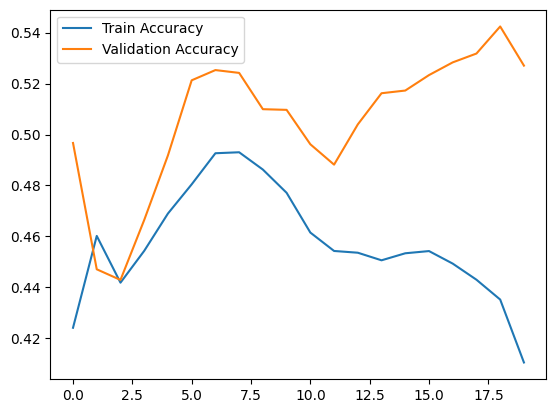

In [100]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [101]:
y_train_predicted = model.predict(X_train)
y_train_predicted= np.argmax(y_train_predicted,axis=1)
y_val_predicted= model.predict(X_val)
y_val_predicted= np.argmax(y_val_predicted,axis=1)

14351/14351 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step
3588/3588 ━━━━━━━━━━━━━━━━━━━━ 4s 976us/step


In [102]:
print(classification_report(y_train.numpy(), y_train_predicted))

              precision    recall  f1-score   support

         0.0       0.35      0.61      0.45     10013
         1.0       0.82      0.81      0.81    232945
         2.0       0.17      0.17      0.17     55046
         3.0       0.65      0.09      0.16    118645
         4.0       0.33      0.67      0.45     38738
         5.0       0.05      0.58      0.10      3384
         6.0       0.00      0.00      0.00        78
         7.0       0.01      0.78      0.02       370

    accuracy                           0.53    459219
   macro avg       0.30      0.46      0.27    459219
weighted avg       0.64      0.53      0.52    459219



c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [103]:
print(classification_report(y_val.numpy(), y_val_predicted))

c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.35      0.59      0.44      2462
         1.0       0.82      0.81      0.81     58133
         2.0       0.17      0.17      0.17     13860
         3.0       0.65      0.09      0.15     29862
         4.0       0.33      0.66      0.44      9542
         5.0       0.05      0.58      0.09       827
         6.0       0.00      0.00      0.00        19
         7.0       0.01      0.86      0.03       100

    accuracy                           0.53    114805
   macro avg       0.30      0.47      0.27    114805
weighted avg       0.64      0.53      0.52    114805



c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [104]:
# Import dataset
test_df = pd.read_csv('./preprocessed_data/test_data.csv', index_col = 'Claim Identifier')
test_df

,Accident Date,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Known Accident Date,...,Zip_Code_Hash_12,Zip_Code_Hash_13,Zip_Code_Hash_14,Zip_Code_Hash_15,Zip_Code_Hash_16,Zip_Code_Hash_17,Zip_Code_Hash_18,Zip_Code_Hash_19,Accident_Season_Sin,Accident_Season_Cos
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19.0,NaN,2003.0,0.0,31.0,10.0,54.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00
6166141,2022-11-20,19.0,NaN,2003.0,0.0,75.0,10.0,10.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000e+00,-1.836970e-16
6165907,2022-12-26,59.0,NaN,1963.0,0.0,68.0,49.0,62.0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00
6166047,2022-12-28,55.0,NaN,1967.0,0.0,25.0,10.0,53.0,6,1,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00
6166102,2022-12-20,25.0,NaN,1997.0,0.0,79.0,40.0,37.0,5,1,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52.0,NaN,1960.0,0.0,NaN,NaN,NaN,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.224647e-16,-1.000000e+00
6553119,2024-05-22,59.0,NaN,1965.0,0.0,NaN,NaN,NaN,1,1,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,6.123234e-17
6553542,2024-05-06,45.0,NaN,1979.0,0.0,NaN,NaN,NaN,5,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000e+00,6.123234e-17


In [105]:
test_df.drop('Accident Date', axis=1, inplace=True) # Use to calculate date of birth after age inputed

In [106]:
X_test = test_df.copy()

In [107]:
X_test.fillna(median_avg_week_wage, inplace=True)
X_test['Relative_Wage'] = np.where(X_test['Average Weekly Wage'] > median_avg_week_wage, 1,0) #('Above Median', 'Below Median')
Financial_Impact(X_test)

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Known Accident Date,Known Assembly Date,...,Zip_Code_Hash_14,Zip_Code_Hash_15,Zip_Code_Hash_16,Zip_Code_Hash_17,Zip_Code_Hash_18,Zip_Code_Hash_19,Accident_Season_Sin,Accident_Season_Cos,Relative_Wage,Financial Impact Category
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,19.00,1068.67,2003.00,0.0,31.00,10.00,54.00,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,0,1
6166141,19.00,1068.67,2003.00,0.0,75.00,10.00,10.00,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000e+00,-1.836970e-16,0,1
6165907,59.00,1068.67,1963.00,0.0,68.00,49.00,62.00,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,0,1
6166047,55.00,1068.67,1967.00,0.0,25.00,10.00,53.00,6,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,0,2
6166102,25.00,1068.67,1997.00,0.0,79.00,40.00,37.00,5,1,1,...,0.0,0.0,-1.0,0.0,0.0,0.0,-1.000000e+00,-1.836970e-16,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,52.00,1068.67,1960.00,0.0,1068.67,1068.67,1068.67,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.224647e-16,-1.000000e+00,0,2
6553119,59.00,1068.67,1965.00,0.0,1068.67,1068.67,1068.67,1,1,1,...,-1.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,6.123234e-17,0,1
6553542,45.00,1068.67,1979.00,0.0,1068.67,1068.67,1068.67,5,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.000000e+00,6.123234e-17,0,2


In [108]:
X_test = scaler.transform(X_test)

In [109]:
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [110]:
y_test_predicted = model.predict(X_test)
y_test_predicted= np.argmax(y_test_predicted,axis=1)

12125/12125 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step


In [111]:
class_mapping = {
    0:'1. CANCELLED', 
    1:'2. NON-COMP',
    2:'3. MED ONLY', 
    3:'4. TEMPORARY',
    4:'5. PPD SCH LOSS', 
    5:'6. PPD NSL', 
    6:'7. PTD', 
    7:'8. DEATH'
}

In [112]:
y_test_final = np.array([class_mapping[i] for i in y_test_predicted])

In [113]:
test_id = test_df.index

In [114]:
submission_df = pd.DataFrame({
    'Claim Identifier': test_id,
    'Claim Injury Type': y_test_final
})

In [115]:
# Save the DataFrame to a CSV file
submission_df.to_csv('./submissions/Group49_Version04.csv', index=False)